Classification

In [70]:
! pip install matplotlib

     |████████████████████████████████| 11.3 MB 3.7 MB/s            
     |████████████████████████████████| 884 kB 3.5 MB/s            3.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 1.0 MB/s            
     |████████████████████████████████| 3.1 MB 5.2 MB/s            �██████▉           | 2.0 MB 5.2 MB/s eta 0:00:01


In [71]:
import autosklearn.classification
import autosklearn.regression
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import matplotlib.pyplot as plt

X, y = sklearn.datasets.make_classification(n_samples = 50, n_features = 4)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)

In [30]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task = 60, per_run_time_limit = 15, initial_configurations_via_metalearning = 25, ensemble_size = 50, 
    resampling_strategy = "holdout", resampling_strategy_arguments = {"train_size ": 0.75}, n_jobs = -1)
automl.fit(X_train, y_train)

AutoSklearnClassifier(n_jobs=-1, per_run_time_limit=15,
                      resampling_strategy_arguments={'train_size ': 0.75},
                      time_left_for_this_task=60)

In [31]:
y_hat = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))

Accuracy score 0.7692307692307693


In [32]:
print(automl.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
4            1             0.16      random_forest  0.153846   5.519397
7            2             0.30                mlp  0.153846   5.547785
8            3             0.10                mlp  0.153846   6.132545
3            4             0.12         libsvm_svc  0.230769   3.689941
5            5             0.08  gradient_boosting  0.230769   1.521920
2            6             0.14      random_forest  0.307692  12.337079
6            7             0.10      decision_tree  0.307692   1.947133


In [33]:
print(automl.show_models())

[(0.300000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'mlp', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'classifier:mlp:activation': 'tanh', 'classifier:mlp:alpha': 0.00021148999718383549, 'classifier:mlp:batch_size': 'auto', 'classifier:mlp:beta_1': 0.9, 'classifier:mlp:beta_2': 0.999, 'classifier:mlp:early_stopping': 'train', 'classifier:mlp:epsilon': 1e-08, 'classifier:mlp:hidden_layer_depth': 3, 'classifier:mlp:learning_rate_init': 0.0007452270241186694, 'classifier:mlp:n_iter_no_change': 32, 'classifier:mlp:num_nodes_per_layer': 113, 'classifier:mlp:shuffle': 'True', 'classifier:mlp:solver': 'adam', 'classifier:mlp:tol': 0.0001, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessor:feature_

Regression

In [39]:
X, y = sklearn.datasets.make_regression(n_samples = 50, n_features = 4)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)

In [40]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task = 60, per_run_time_limit = 15, initial_configurations_via_metalearning = 25, ensemble_size = 50, 
    resampling_strategy = "holdout", resampling_strategy_arguments = {"train_size ": 0.75}, n_jobs = -1)
automl.fit(X_train, y_train)

AutoSklearnRegressor(n_jobs=-1, per_run_time_limit=15,
                     resampling_strategy_arguments={'train_size ': 0.75},
                     time_left_for_this_task=60)

In [41]:
print(automl.leaderboard())

          rank  ensemble_weight            type          cost  duration
model_id                                                               
7            1              1.0  ard_regression  4.440892e-16  1.189296


In [42]:
print(automl.leaderboard())

          rank  ensemble_weight            type          cost  duration
model_id                                                               
7            1              1.0  ard_regression  4.440892e-16  1.189296


In [43]:
print(automl.show_models())

[(1.000000, SimpleRegressionPipeline({'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'polynomial', 'regressor:__choice__': 'ard_regression', 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:polynomial:degree': 2, 'feature_preprocessor:polynomial:include_bias': 'True', 'feature_preprocessor:polynomial:interaction_only': 'False', 'regressor:ard_regression:alpha_1': 0.0003701926442639788, 'regressor:ard_regression:alpha_2': 2.2118001735899097e-07, 'regressor:ard_regression:fit_intercept': 'True', 'regressor:ard_regression:lambda_1': 1.2037591637980971e-06, 'regressor:ard_regression:la

In [44]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.9999999999999991
Test R2 score: 0.9999999999999994


In [45]:
plt.scatter(train_predictions, y_train, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, y_test, label="Test samples", c='#7570b3')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.plot([30, 400], [30, 400], c='k', zorder=0)
plt.xlim([30, 400])
plt.ylim([30, 400])
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

Multi-output Regression

In [47]:
import numpy as numpy

from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from autosklearn.regression import AutoSklearnRegressor

In [48]:
X, y = make_regression(n_samples=100, n_features=3, n_informative=5, n_targets=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [49]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task = 60, per_run_time_limit = 15, initial_configurations_via_metalearning = 25, ensemble_size = 50, 
    resampling_strategy = "holdout", resampling_strategy_arguments = {"train_size ": 0.75}, n_jobs = -1)
automl.fit(X_train, y_train)

[WARNING] [2021-12-04 11:50:44,115:Client-AutoMLSMBO(1)::691e097f-54f8-11ec-8074-0242ac110002] Could not find meta-data directory /usr/local/lib/python3.8/dist-packages/autosklearn/metalearning/files/r2_multioutput.regression_dense


AutoSklearnRegressor(n_jobs=-1, per_run_time_limit=15,
                     resampling_strategy_arguments={'train_size ': 0.75},
                     time_left_for_this_task=60)

In [50]:
print(automl.leaderboard())

          rank  ensemble_weight              type      cost  duration
model_id                                                             
10           1              1.0  gaussian_process  0.000252   0.85009


In [51]:
print(automl.show_models())

[(1.000000, SimpleRegressionPipeline({'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'pca', 'regressor:__choice__': 'gaussian_process', 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize', 'feature_preprocessor:pca:keep_variance': 0.8383155747444035, 'feature_preprocessor:pca:whiten': 'False', 'regressor:gaussian_process:alpha': 0.0010554870012299713, 'regressor:gaussian_process:thetaL': 6.289877951311878e-06, 'regressor:gaussian_process:thetaU': 634.2617702295277, 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.3420173510738614},
dataset_prope

In [52]:
predictions = automl.predict(X_test)
print("R2 score:", r2_score(y_test, predictions))

R2 score: 0.998432687497716


In [53]:
print(automl.get_configuration_space(X_train, y_train))

Configuration space object:
  Hyperparameters:
    data_preprocessor:__choice__, Type: Categorical, Choices: {feature_type}, Default: feature_type
    data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__, Type: Categorical, Choices: {encoding, no_encoding, one_hot_encoding}, Default: one_hot_encoding
    data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__, Type: Categorical, Choices: {minority_coalescer, no_coalescense}, Default: minority_coalescer
    data_preprocessor:feature_type:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction, Type: UniformFloat, Range: [0.0001, 0.5], Default: 0.01, on log-scale
    data_preprocessor:feature_type:numerical_transformer:imputation:strategy, Type: Categorical, Choices: {mean, median, most_frequent}, Default: mean
    data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__, Type: Categorical, Choices: {minmax, none, normalize, power_t

Interpretable models

In [56]:
X, y = sklearn.datasets.make_classification(n_samples = 50, n_features = 4)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)

In [57]:
from autosklearn.pipeline.components.classification import ClassifierChoice

for name in ClassifierChoice.get_components():
    print(name)

adaboost
bernoulli_nb
decision_tree
extra_trees
gaussian_nb
gradient_boosting
k_nearest_neighbors
lda
liblinear_svc
libsvm_svc
mlp
multinomial_nb
passive_aggressive
qda
random_forest
sgd


In [58]:
from autosklearn.pipeline.components.feature_preprocessing import FeaturePreprocessorChoice

for name in FeaturePreprocessorChoice.get_components():
    print(name)

densifier
extra_trees_preproc_for_classification
extra_trees_preproc_for_regression
fast_ica
feature_agglomeration
kernel_pca
kitchen_sinks
liblinear_svc_preprocessor
no_preprocessing
nystroem_sampler
pca
polynomial
random_trees_embedding
select_percentile_classification
select_percentile_regression
select_rates_classification
select_rates_regression
truncatedSVD


In [59]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task = 60, per_run_time_limit = 15, initial_configurations_via_metalearning = 25, ensemble_size = 1, 
    resampling_strategy = "holdout", resampling_strategy_arguments = {"train_size ": 0.75}, n_jobs = -1,
    include={
        'classifier': [
            'decision_tree', 'lda', 'sgd'
        ],
        'feature_preprocessor': [
            'no_preprocessing', 'polynomial', 'select_percentile_classification'
        ]
    })
automl.fit(X_train, y_train)

[WARNING] [2021-12-04 11:56:29,167:Client-AutoMLSMBO(1)::367d2f4b-54f9-11ec-8074-0242ac110002] Configuration 358 not found
[WARNING] [2021-12-04 11:56:29,169:Client-AutoMLSMBO(1)::367d2f4b-54f9-11ec-8074-0242ac110002] Configuration 560 not found
[WARNING] [2021-12-04 11:56:29,169:Client-AutoMLSMBO(1)::367d2f4b-54f9-11ec-8074-0242ac110002] Configuration 345 not found
[WARNING] [2021-12-04 11:56:29,169:Client-AutoMLSMBO(1)::367d2f4b-54f9-11ec-8074-0242ac110002] Configuration 149 not found
[WARNING] [2021-12-04 11:56:29,169:Client-AutoMLSMBO(1)::367d2f4b-54f9-11ec-8074-0242ac110002] Configuration 184 not found
[WARNING] [2021-12-04 11:56:29,169:Client-AutoMLSMBO(1)::367d2f4b-54f9-11ec-8074-0242ac110002] Configuration 75 not found
[WARNING] [2021-12-04 11:56:29,169:Client-AutoMLSMBO(1)::367d2f4b-54f9-11ec-8074-0242ac110002] Configuration 663 not found
[WARNING] [2021-12-04 11:56:29,169:Client-AutoMLSMBO(1)::367d2f4b-54f9-11ec-8074-0242ac110002] Configuration 590 not found
[WARNING] [2021-1

AutoSklearnClassifier(ensemble_size=1,
                      include={'classifier': ['decision_tree', 'lda', 'sgd'],
                               'feature_preprocessor': ['no_preprocessing',
                                                        'polynomial',
                                                        'select_percentile_classification']},
                      n_jobs=-1, per_run_time_limit=15,
                      resampling_strategy_arguments={'train_size ': 0.75},
                      time_left_for_this_task=60)

In [60]:
print(automl.show_models())

[(1.000000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'sgd', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'polynomial', 'classifier:sgd:alpha': 0.0018367485569817758, 'classifier:sgd:average': 'True', 'classifier:sgd:fit_intercept': 'True', 'classifier:sgd:learning_rate': 'constant', 'classifier:sgd:loss': 'modified_huber', 'classifier:sgd:penalty': 'l1', 'classifier:sgd:tol': 5.2594585460405347e-05, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'normalize', 'feature_preprocessor:polynomial:degree': 3, 'feature_preprocessor:polynomial:include_bias': 'True', 'feature

In [62]:
print(automl.leaderboard())

          rank  ensemble_weight type      cost  duration
model_id                                                
7            1              1.0  sgd  0.076923  0.927739


In [61]:
predictions = automl.predict(X_test)
print("Accuracy score:", sklearn.metrics.accuracy_score(y_test, predictions))

Accuracy score: 1.0


Model Explanation

In [64]:
import sklearn.datasets
from sklearn.inspection import plot_partial_dependence, permutation_importance
import autosklearn.classification

In [66]:
dataset = sklearn.datasets.fetch_openml(data_id=40922)

# Note: To speed up the example, we subsample the dataset
dataset.data = dataset.data.sample(n=100, random_state=1, axis="index")
dataset.target = dataset.target[dataset.data.index]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    dataset.data, dataset.target, test_size=0.3, random_state=1
)

In [67]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task = 60, per_run_time_limit = 15, initial_configurations_via_metalearning = 25, ensemble_size = 50, 
    resampling_strategy = "holdout", resampling_strategy_arguments = {"train_size ": 0.75}, n_jobs = -1)
automl.fit(X_train, y_train)

s = automl.score(X_train, y_train)
print(f"Train score {s}")
s = automl.score(X_test, y_test)
print(f"Test score {s}")

Train score 1.0
Test score 0.7666666666666667


In [74]:
r = permutation_importance(automl, X_test, y_test, n_repeats=10, random_state=0)
sort_idx = r.importances_mean.argsort()[::-1]

plt.boxplot(r.importances[sort_idx].T,
            labels=[dataset.feature_names[i] for i in sort_idx])

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

for i in sort_idx[::-1]:
    print(f"{dataset.feature_names[i]:10s}: {r.importances_mean[i]:.3f} +/- "
          f"{r.importances_std[i]:.3f}")

ValueError: X has 4 features, but ColumnTransformer is expecting 6 features as input.

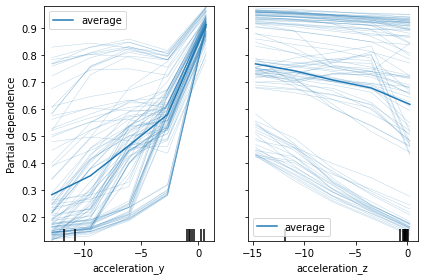

In [73]:
features = [1, 2]
plot_partial_dependence(automl, dataset.data,
                        features=features,
                        grid_resolution=5,
                        kind="both",
                        feature_names=dataset.feature_names)
plt.tight_layout()
plt.show()

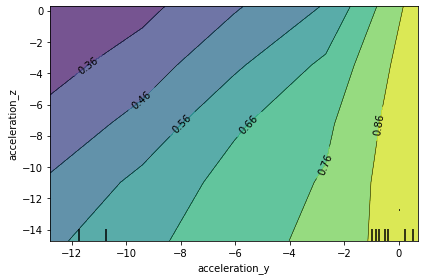

In [72]:
features = [[1, 2]]
plot_partial_dependence(automl, dataset.data,
                        features=features,
                        grid_resolution=5,
                        feature_names=dataset.feature_names)
plt.tight_layout()
plt.show()

Successive Halving

In [ ]:
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

import autosklearn.classification

In [75]:
def get_smac_object_callback(budget_type):
    def get_smac_object(
        scenario_dict,
        seed,
        ta,
        ta_kwargs,
        metalearning_configurations,
        n_jobs,
        dask_client,
    ):
        from smac.facade.smac_ac_facade import SMAC4AC
        from smac.intensification.successive_halving import SuccessiveHalving
        from smac.runhistory.runhistory2epm import RunHistory2EPM4LogCost
        from smac.scenario.scenario import Scenario

        if n_jobs > 1 or (dask_client and len(dask_client.nthreads()) > 1):
            raise ValueError("Please make sure to guard the code invoking Auto-sklearn by "
                             "`if __name__ == '__main__'` and remove this exception.")

        scenario = Scenario(scenario_dict)
        if len(metalearning_configurations) > 0:
            default_config = scenario.cs.get_default_configuration()
            initial_configurations = [default_config] + metalearning_configurations
        else:
            initial_configurations = None
        rh2EPM = RunHistory2EPM4LogCost

        ta_kwargs['budget_type'] = budget_type

        return SMAC4AC(
            scenario=scenario,
            rng=seed,
            runhistory2epm=rh2EPM,
            tae_runner=ta,
            tae_runner_kwargs=ta_kwargs,
            initial_configurations=initial_configurations,
            run_id=seed,
            intensifier=SuccessiveHalving,
            intensifier_kwargs={
                'initial_budget': 5.0,
                'max_budget': 10,
                'eta': 2,
                'min_chall': 1
            },
            n_jobs=n_jobs,
            dask_client=dask_client,
        )
    return get_smac_object

In [76]:
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
dataset.data = dataset.data.sample(n = 100, random_state=1, axis="index")
dataset.target = dataset.target[dataset.data.index]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    dataset.data, dataset.target, test_size=0.3, random_state=1
)

In [77]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=40,
    per_run_time_limit=10,
    n_jobs = -1,
    disable_evaluator_output=False,
    # 'holdout' with 'train_size'=0.67 is the default argument setting
    # for AutoSklearnClassifier. It is explicitly specified in this example
    # for demonstrational purpose.
    resampling_strategy='holdout',
    resampling_strategy_arguments={'train_size': 0.67},
    include={
        'classifier': [
            'extra_trees', 'gradient_boosting', 'random_forest',
            'sgd', 'passive_aggressive'
        ],
        'feature_preprocessor': ['no_preprocessing']
    },
    get_smac_object_callback=get_smac_object_callback('iterations'),
)
automl.fit(X_train, y_train, dataset_name='breast_cancer')

[WARNING] [2021-12-04 12:08:13,508:Client-AutoMLSMBO(1)::breast_cancer] Configuration 176 not found
[WARNING] [2021-12-04 12:08:13,508:Client-AutoMLSMBO(1)::breast_cancer] Configuration 476 not found
[WARNING] [2021-12-04 12:08:13,509:Client-AutoMLSMBO(1)::breast_cancer] Configuration 663 not found
[WARNING] [2021-12-04 12:08:13,509:Client-AutoMLSMBO(1)::breast_cancer] Configuration 492 not found
[WARNING] [2021-12-04 12:08:13,510:Client-AutoMLSMBO(1)::breast_cancer] Configuration 184 not found
[WARNING] [2021-12-04 12:08:13,509:Client-AutoMLSMBO(1)::breast_cancer] Configuration 32 not found
[WARNING] [2021-12-04 12:08:13,509:Client-AutoMLSMBO(1)::breast_cancer] Configuration 91 not found
[WARNING] [2021-12-04 12:08:13,510:Client-AutoMLSMBO(1)::breast_cancer] Configuration 22 not found
[WARNING] [2021-12-04 12:08:13,510:Client-AutoMLSMBO(1)::breast_cancer] Configuration 257 not found
[WARNING] [2021-12-04 12:08:13,510:Client-AutoMLSMBO(1)::breast_cancer] Configuration 440 not found
[WA

/usr/local/lib/python3.8/dist-packages/smac/intensification/parallel_scheduling.py:152: UserWarning: SuccessiveHalving is intended to be used with more than 1 worker but num_workers=1
  warnings.warn("{} is intended to be used "


[WARNING] [2021-12-04 12:08:13,511:Client-AutoMLSMBO(1)::breast_cancer] Configuration 227 not found
[WARNING] [2021-12-04 12:08:13,511:Client-AutoMLSMBO(1)::breast_cancer] Configuration 506 not found
[WARNING] [2021-12-04 12:08:13,511:Client-AutoMLSMBO(1)::breast_cancer] Configuration 454 not found
[WARNING] [2021-12-04 12:08:13,512:Client-AutoMLSMBO(1)::breast_cancer] Configuration 532 not found
[WARNING] [2021-12-04 12:08:13,512:Client-AutoMLSMBO(1)::breast_cancer] Configuration 1 not found
[WARNING] [2021-12-04 12:08:13,512:Client-AutoMLSMBO(1)::breast_cancer] Configuration 238 not found
[WARNING] [2021-12-04 12:08:13,512:Client-AutoMLSMBO(1)::breast_cancer] Configuration 191 not found
[WARNING] [2021-12-04 12:08:13,512:Client-AutoMLSMBO(1)::breast_cancer] Configuration 576 not found
[WARNING] [2021-12-04 12:08:13,512:Client-AutoMLSMBO(1)::breast_cancer] Configuration 518 not found
[WARNING] [2021-12-04 12:08:13,512:Client-AutoMLSMBO(1)::breast_cancer] Configuration 393 not found
[W

AutoSklearnClassifier(get_smac_object_callback=<function get_smac_object_callback.<locals>.get_smac_object at 0x7f760d20e280>,
                      include={'classifier': ['extra_trees',
                                              'gradient_boosting',
                                              'random_forest', 'sgd',
                                              'passive_aggressive'],
                               'feature_preprocessor': ['no_preprocessing']},
                      n_jobs=-1, per_run_time_limit=10,
                      resampling_strategy_arguments={'train_size': 0.67},
                      time_left_for_this_task=40)

In [81]:
print(automl.leaderboard())

          rank  ensemble_weight                type      cost  duration
model_id                                                               
3            1             0.08       random_forest  0.083333  1.176703
9            2             0.06         extra_trees  0.083333  0.953279
11           3             0.06   gradient_boosting  0.083333  1.421382
2            4             0.06       random_forest  0.125000  4.567762
5            5             0.12   gradient_boosting  0.125000  1.531363
6            6             0.12   gradient_boosting  0.125000  0.777610
8            7             0.04       random_forest  0.125000  0.906675
7            8             0.02                 sgd  0.166667  0.664538
4            9             0.10  passive_aggressive  0.250000  0.997079
10          10             0.12   gradient_boosting  0.375000  1.474922


In [80]:
predictions = automl.predict(X_test)
# Print statistics about the auto-sklearn run such as number of
# iterations, number of models failed with a time out.
print(automl.sprint_statistics())
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

auto-sklearn results:
  Dataset name: breast_cancer
  Metric: accuracy
  Best validation score: 0.916667
  Number of target algorithm runs: 15
  Number of successful target algorithm runs: 14
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0

Accuracy score 0.9333333333333333


In [83]:
# CV

automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=40,
    per_run_time_limit=10,
    n_jobs = -1,
    disable_evaluator_output=False,
    # 'holdout' with 'train_size'=0.67 is the default argument setting
    # for AutoSklearnClassifier. It is explicitly specified in this example
    # for demonstrational purpose.
    resampling_strategy='cv',
    resampling_strategy_arguments={'train_size': 0.67},
    include={
        'classifier': [
            'extra_trees', 'gradient_boosting', 'random_forest',
            'sgd', 'passive_aggressive'
        ],
        'feature_preprocessor': ['no_preprocessing']
    },
    get_smac_object_callback=get_smac_object_callback('iterations'),
)
automl.fit(X_train, y_train, dataset_name='breast_cancer')

[WARNING] [2021-12-04 12:11:37,232:Client-AutoMLSMBO(1)::breast_cancer] Configuration 176 not found
[WARNING] [2021-12-04 12:11:37,234:Client-AutoMLSMBO(1)::breast_cancer] Configuration 162 not found
[WARNING] [2021-12-04 12:11:37,234:Client-AutoMLSMBO(1)::breast_cancer] Configuration 476 not found
[WARNING] [2021-12-04 12:11:37,234:Client-AutoMLSMBO(1)::breast_cancer] Configuration 601 not found
[WARNING] [2021-12-04 12:11:37,234:Client-AutoMLSMBO(1)::breast_cancer] Configuration 492 not found
[WARNING] [2021-12-04 12:11:37,234:Client-AutoMLSMBO(1)::breast_cancer] Configuration 440 not found
[WARNING] [2021-12-04 12:11:37,234:Client-AutoMLSMBO(1)::breast_cancer] Configuration 32 not found
[WARNING] [2021-12-04 12:11:37,234:Client-AutoMLSMBO(1)::breast_cancer] Configuration 220 not found
[WARNING] [2021-12-04 12:11:37,235:Client-AutoMLSMBO(1)::breast_cancer] Configuration 407 not found
[WARNING] [2021-12-04 12:11:37,235:Client-AutoMLSMBO(1)::breast_cancer] Configuration 332 not found
[

/usr/local/lib/python3.8/dist-packages/smac/intensification/parallel_scheduling.py:152: UserWarning: SuccessiveHalving is intended to be used with more than 1 worker but num_workers=1
  warnings.warn("{} is intended to be used "


[WARNING] [2021-12-04 12:11:37,237:Client-AutoMLSMBO(1)::breast_cancer] Configuration 532 not found
[WARNING] [2021-12-04 12:11:37,238:Client-AutoMLSMBO(1)::breast_cancer] Configuration 315 not found
[WARNING] [2021-12-04 12:11:37,238:Client-AutoMLSMBO(1)::breast_cancer] Configuration 138 not found
[WARNING] [2021-12-04 12:11:37,238:Client-AutoMLSMBO(1)::breast_cancer] Configuration 206 not found
[WARNING] [2021-12-04 12:11:37,238:Client-AutoMLSMBO(1)::breast_cancer] Configuration 579 not found
[WARNING] [2021-12-04 12:11:37,238:Client-AutoMLSMBO(1)::breast_cancer] Configuration 454 not found
[WARNING] [2021-12-04 12:11:37,238:Client-AutoMLSMBO(1)::breast_cancer] Configuration 147 not found
[WARNING] [2021-12-04 12:11:37,238:Client-AutoMLSMBO(1)::breast_cancer] Configuration 1 not found
[WARNING] [2021-12-04 12:11:37,238:Client-AutoMLSMBO(1)::breast_cancer] Configuration 393 not found
[WARNING] [2021-12-04 12:11:37,238:Client-AutoMLSMBO(1)::breast_cancer] Configuration 347 not found
[W

AutoSklearnClassifier(get_smac_object_callback=<function get_smac_object_callback.<locals>.get_smac_object at 0x7f76116153a0>,
                      include={'classifier': ['extra_trees',
                                              'gradient_boosting',
                                              'random_forest', 'sgd',
                                              'passive_aggressive'],
                               'feature_preprocessor': ['no_preprocessing']},
                      n_jobs=-1, per_run_time_limit=10,
                      resampling_strategy='cv',
                      resampling_strategy_arguments={'folds': 5,
                                                     'train_size': 0.67},
                      time_left_for_this_task=40)

In [84]:
print(automl.leaderboard())

          rank  ensemble_weight           type      cost  duration
model_id                                                          
3            1             0.58  random_forest  0.051643   6.21423


In [85]:
predictions = automl.predict(X_test)
# Print statistics about the auto-sklearn run such as number of
# iterations, number of models failed with a time out.
print(automl.sprint_statistics())
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

auto-sklearn results:
  Dataset name: breast_cancer
  Metric: accuracy
  Best validation score: 0.948357
  Number of target algorithm runs: 4
  Number of successful target algorithm runs: 3
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0

Accuracy score 0.9440559440559441


In [86]:
# Iterative CV

automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=40,
    per_run_time_limit=10,
    n_jobs = -1,
    disable_evaluator_output=False,
    # 'holdout' with 'train_size'=0.67 is the default argument setting
    # for AutoSklearnClassifier. It is explicitly specified in this example
    # for demonstrational purpose.
    resampling_strategy='cv-iterative-fit',
    resampling_strategy_arguments={'train_size': 0.67},
    include={
        'classifier': [
            'extra_trees', 'gradient_boosting', 'random_forest',
            'sgd', 'passive_aggressive'
        ],
        'feature_preprocessor': ['no_preprocessing']
    },
    get_smac_object_callback=get_smac_object_callback('iterations'),
)
automl.fit(X_train, y_train, dataset_name='breast_cancer')

[WARNING] [2021-12-04 12:12:22,690:Client-AutoMLSMBO(1)::breast_cancer] Configuration 176 not found
[WARNING] [2021-12-04 12:12:22,693:Client-AutoMLSMBO(1)::breast_cancer] Configuration 162 not found
[WARNING] [2021-12-04 12:12:22,694:Client-AutoMLSMBO(1)::breast_cancer] Configuration 476 not found
[WARNING] [2021-12-04 12:12:22,694:Client-AutoMLSMBO(1)::breast_cancer] Configuration 601 not found
[WARNING] [2021-12-04 12:12:22,694:Client-AutoMLSMBO(1)::breast_cancer] Configuration 492 not found
[WARNING] [2021-12-04 12:12:22,694:Client-AutoMLSMBO(1)::breast_cancer] Configuration 440 not found
[WARNING] [2021-12-04 12:12:22,694:Client-AutoMLSMBO(1)::breast_cancer] Configuration 32 not found
[WARNING] [2021-12-04 12:12:22,694:Client-AutoMLSMBO(1)::breast_cancer] Configuration 220 not found
[WARNING] [2021-12-04 12:12:22,694:Client-AutoMLSMBO(1)::breast_cancer] Configuration 332 not found
[WARNING] [2021-12-04 12:12:22,695:Client-AutoMLSMBO(1)::breast_cancer] Configuration 91 not found
[W

/usr/local/lib/python3.8/dist-packages/smac/intensification/parallel_scheduling.py:152: UserWarning: SuccessiveHalving is intended to be used with more than 1 worker but num_workers=1
  warnings.warn("{} is intended to be used "


[WARNING] [2021-12-04 12:12:22,723:Client-AutoMLSMBO(1)::breast_cancer] Configuration 694 not found
[WARNING] [2021-12-04 12:12:22,723:Client-AutoMLSMBO(1)::breast_cancer] Configuration 426 not found
[WARNING] [2021-12-04 12:12:22,723:Client-AutoMLSMBO(1)::breast_cancer] Configuration 327 not found
[WARNING] [2021-12-04 12:12:22,723:Client-AutoMLSMBO(1)::breast_cancer] Configuration 657 not found
[WARNING] [2021-12-04 12:12:22,726:Client-AutoMLSMBO(1)::breast_cancer] Configuration 532 not found
[WARNING] [2021-12-04 12:12:22,726:Client-AutoMLSMBO(1)::breast_cancer] Configuration 315 not found
[WARNING] [2021-12-04 12:12:22,726:Client-AutoMLSMBO(1)::breast_cancer] Configuration 138 not found
[WARNING] [2021-12-04 12:12:22,726:Client-AutoMLSMBO(1)::breast_cancer] Configuration 206 not found
[WARNING] [2021-12-04 12:12:22,726:Client-AutoMLSMBO(1)::breast_cancer] Configuration 579 not found
[WARNING] [2021-12-04 12:12:22,727:Client-AutoMLSMBO(1)::breast_cancer] Configuration 454 not found


AutoSklearnClassifier(get_smac_object_callback=<function get_smac_object_callback.<locals>.get_smac_object at 0x7f760c18eb80>,
                      include={'classifier': ['extra_trees',
                                              'gradient_boosting',
                                              'random_forest', 'sgd',
                                              'passive_aggressive'],
                               'feature_preprocessor': ['no_preprocessing']},
                      n_jobs=-1, per_run_time_limit=10,
                      resampling_strategy='cv-iterative-fit',
                      resampling_strategy_arguments={'folds': 5,
                                                     'train_size': 0.67},
                      time_left_for_this_task=40)

In [87]:
print(automl.leaderboard())

          rank  ensemble_weight                type      cost   duration
model_id                                                                
2            1             0.22       random_forest  0.051643  10.190765
3            2             0.38       random_forest  0.053991   8.361228
4            3             0.40  passive_aggressive  0.131455   5.028059


In [88]:
predictions = automl.predict(X_test)
# Print statistics about the auto-sklearn run such as number of
# iterations, number of models failed with a time out.
print(automl.sprint_statistics())
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

auto-sklearn results:
  Dataset name: breast_cancer
  Metric: accuracy
  Best validation score: 0.948357
  Number of target algorithm runs: 3
  Number of successful target algorithm runs: 3
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0

Accuracy score 0.9440559440559441


In [89]:
# CV

automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=40,
    per_run_time_limit=10,
    n_jobs = -1,
    disable_evaluator_output=False,
    # 'holdout' with 'train_size'=0.67 is the default argument setting
    # for AutoSklearnClassifier. It is explicitly specified in this example
    # for demonstrational purpose.
    resampling_strategy='holdout',
    resampling_strategy_arguments={'train_size': 0.67},
    include={
        'classifier': [
            'extra_trees', 'gradient_boosting', 'random_forest',
            'sgd', 'passive_aggressive'
        ],
        'feature_preprocessor': ['no_preprocessing']
    },
    get_smac_object_callback=get_smac_object_callback('subsample'),
)
automl.fit(X_train, y_train, dataset_name='breast_cancer')

[WARNING] [2021-12-04 12:15:08,456:Client-AutoMLSMBO(1)::breast_cancer] Configuration 176 not found
[WARNING] [2021-12-04 12:15:08,457:Client-AutoMLSMBO(1)::breast_cancer] Configuration 162 not found
[WARNING] [2021-12-04 12:15:08,458:Client-AutoMLSMBO(1)::breast_cancer] Configuration 476 not found
[WARNING] [2021-12-04 12:15:08,458:Client-AutoMLSMBO(1)::breast_cancer] Configuration 601 not found
[WARNING] [2021-12-04 12:15:08,458:Client-AutoMLSMBO(1)::breast_cancer] Configuration 492 not found
[WARNING] [2021-12-04 12:15:08,458:Client-AutoMLSMBO(1)::breast_cancer] Configuration 440 not found
[WARNING] [2021-12-04 12:15:08,458:Client-AutoMLSMBO(1)::breast_cancer] Configuration 32 not found
[WARNING] [2021-12-04 12:15:08,465:Client-AutoMLSMBO(1)::breast_cancer] Configuration 220 not found
[WARNING] [2021-12-04 12:15:08,466:Client-AutoMLSMBO(1)::breast_cancer] Configuration 332 not found
[WARNING] [2021-12-04 12:15:08,466:Client-AutoMLSMBO(1)::breast_cancer] Configuration 22 not found
[W

/usr/local/lib/python3.8/dist-packages/smac/intensification/parallel_scheduling.py:152: UserWarning: SuccessiveHalving is intended to be used with more than 1 worker but num_workers=1
  warnings.warn("{} is intended to be used "


[WARNING] [2021-12-04 12:15:08,523:Client-AutoMLSMBO(1)::breast_cancer] Configuration 67 not found
[WARNING] [2021-12-04 12:15:08,523:Client-AutoMLSMBO(1)::breast_cancer] Configuration 521 not found
[WARNING] [2021-12-04 12:15:08,523:Client-AutoMLSMBO(1)::breast_cancer] Configuration 227 not found
[WARNING] [2021-12-04 12:15:08,523:Client-AutoMLSMBO(1)::breast_cancer] Configuration 145 not found
[WARNING] [2021-12-04 12:15:08,523:Client-AutoMLSMBO(1)::breast_cancer] Configuration 576 not found
[WARNING] [2021-12-04 12:15:08,523:Client-AutoMLSMBO(1)::breast_cancer] Configuration 680 not found
[WARNING] [2021-12-04 12:15:08,523:Client-AutoMLSMBO(1)::breast_cancer] Configuration 605 not found
[WARNING] [2021-12-04 12:15:08,524:Client-AutoMLSMBO(1)::breast_cancer] Configuration 624 not found
[WARNING] [2021-12-04 12:15:08,524:Client-AutoMLSMBO(1)::breast_cancer] Configuration 191 not found
[WARNING] [2021-12-04 12:15:08,524:Client-AutoMLSMBO(1)::breast_cancer] Configuration 414 not found
[

AutoSklearnClassifier(get_smac_object_callback=<function get_smac_object_callback.<locals>.get_smac_object at 0x7f760c18e700>,
                      include={'classifier': ['extra_trees',
                                              'gradient_boosting',
                                              'random_forest', 'sgd',
                                              'passive_aggressive'],
                               'feature_preprocessor': ['no_preprocessing']},
                      n_jobs=-1, per_run_time_limit=10,
                      resampling_strategy_arguments={'train_size': 0.67},
                      time_left_for_this_task=40)

In [90]:
print(automl.leaderboard())

          rank  ensemble_weight                type      cost  duration
model_id                                                               
7            1             0.18                 sgd  0.049645  0.634556
9            2             0.08         extra_trees  0.070922  2.049212
2            3             0.04       random_forest  0.078014  2.308470
8            4             0.06       random_forest  0.078014  2.046505
6            5             0.02   gradient_boosting  0.113475  0.766493
4            6             0.04  passive_aggressive  0.127660  0.659644
3            7             0.08       random_forest  0.368794  3.017238
5            8             0.10   gradient_boosting  0.368794  1.154328
10           9             0.18   gradient_boosting  0.368794  0.952739


In [91]:
predictions = automl.predict(X_test)
# Print statistics about the auto-sklearn run such as number of
# iterations, number of models failed with a time out.
print(automl.sprint_statistics())
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

auto-sklearn results:
  Dataset name: breast_cancer
  Metric: accuracy
  Best validation score: 0.950355
  Number of target algorithm runs: 13
  Number of successful target algorithm runs: 12
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0

Accuracy score 0.8741258741258742
